In [106]:
import numpy as np
import time
from sklearn.manifold import TSNE
import plotly.express as px
import h5py
import os
import itertools  
import seaborn  as sns
import scipy.io
from random import randrange
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier

# Question 1

In [109]:
#Loading dataset 1
dataset1 = scipy.io.loadmat('dataset_1.mat') #Dictionary type dict_keys(['__header__', '__version__', '__globals__', 'labels', 'samples'])
X_1=dataset1['samples']
X_1=X_1.reshape(50000,784)
y_1=dataset1['labels'][0]
print("Shape of X1:",X_1.shape) #5000 of 28*28 binary values
print("Shape of y1:",len(y_1))

#Loading dataset 2
dataset2 = scipy.io.loadmat('dataset_2.mat') #Dictionary type dict_keys(['__header__', '__version__', '__globals__', 'labels', 'samples'])
X_2=dataset2['samples']
y_2=dataset2['labels'][0]
print("Shape of X2:",X_2.shape) #20000*2
print("Shape of y2:",len(y_2))


Shape of X1: (50000, 784)
Shape of y1: 50000
Shape of X2: (20000, 2)
Shape of y2: 20000


# a.

In [110]:
def plotImage(index):
    rows = 2
    cols = 5
    axes=[]
    fig=plt.figure(figsize=(28,28))
    i=0
    for a in range(rows*cols):
        b=np.array(dataframe.iloc[index[i],:-1]).reshape(28,28)
        axes.append( fig.add_subplot(rows, cols, a+1) )
        subplot_title=("Label  "+str(dataframe.iloc[index[i],-1]))
        axes[-1].set_title(subplot_title,fontsize=20)  
        i+=1
        plt.imshow(b,cmap='gray')
    fig.tight_layout()    
    plt.show()

Distinct classes [0 1 2 3 4 5 6 7 8 9]
For Class: 0


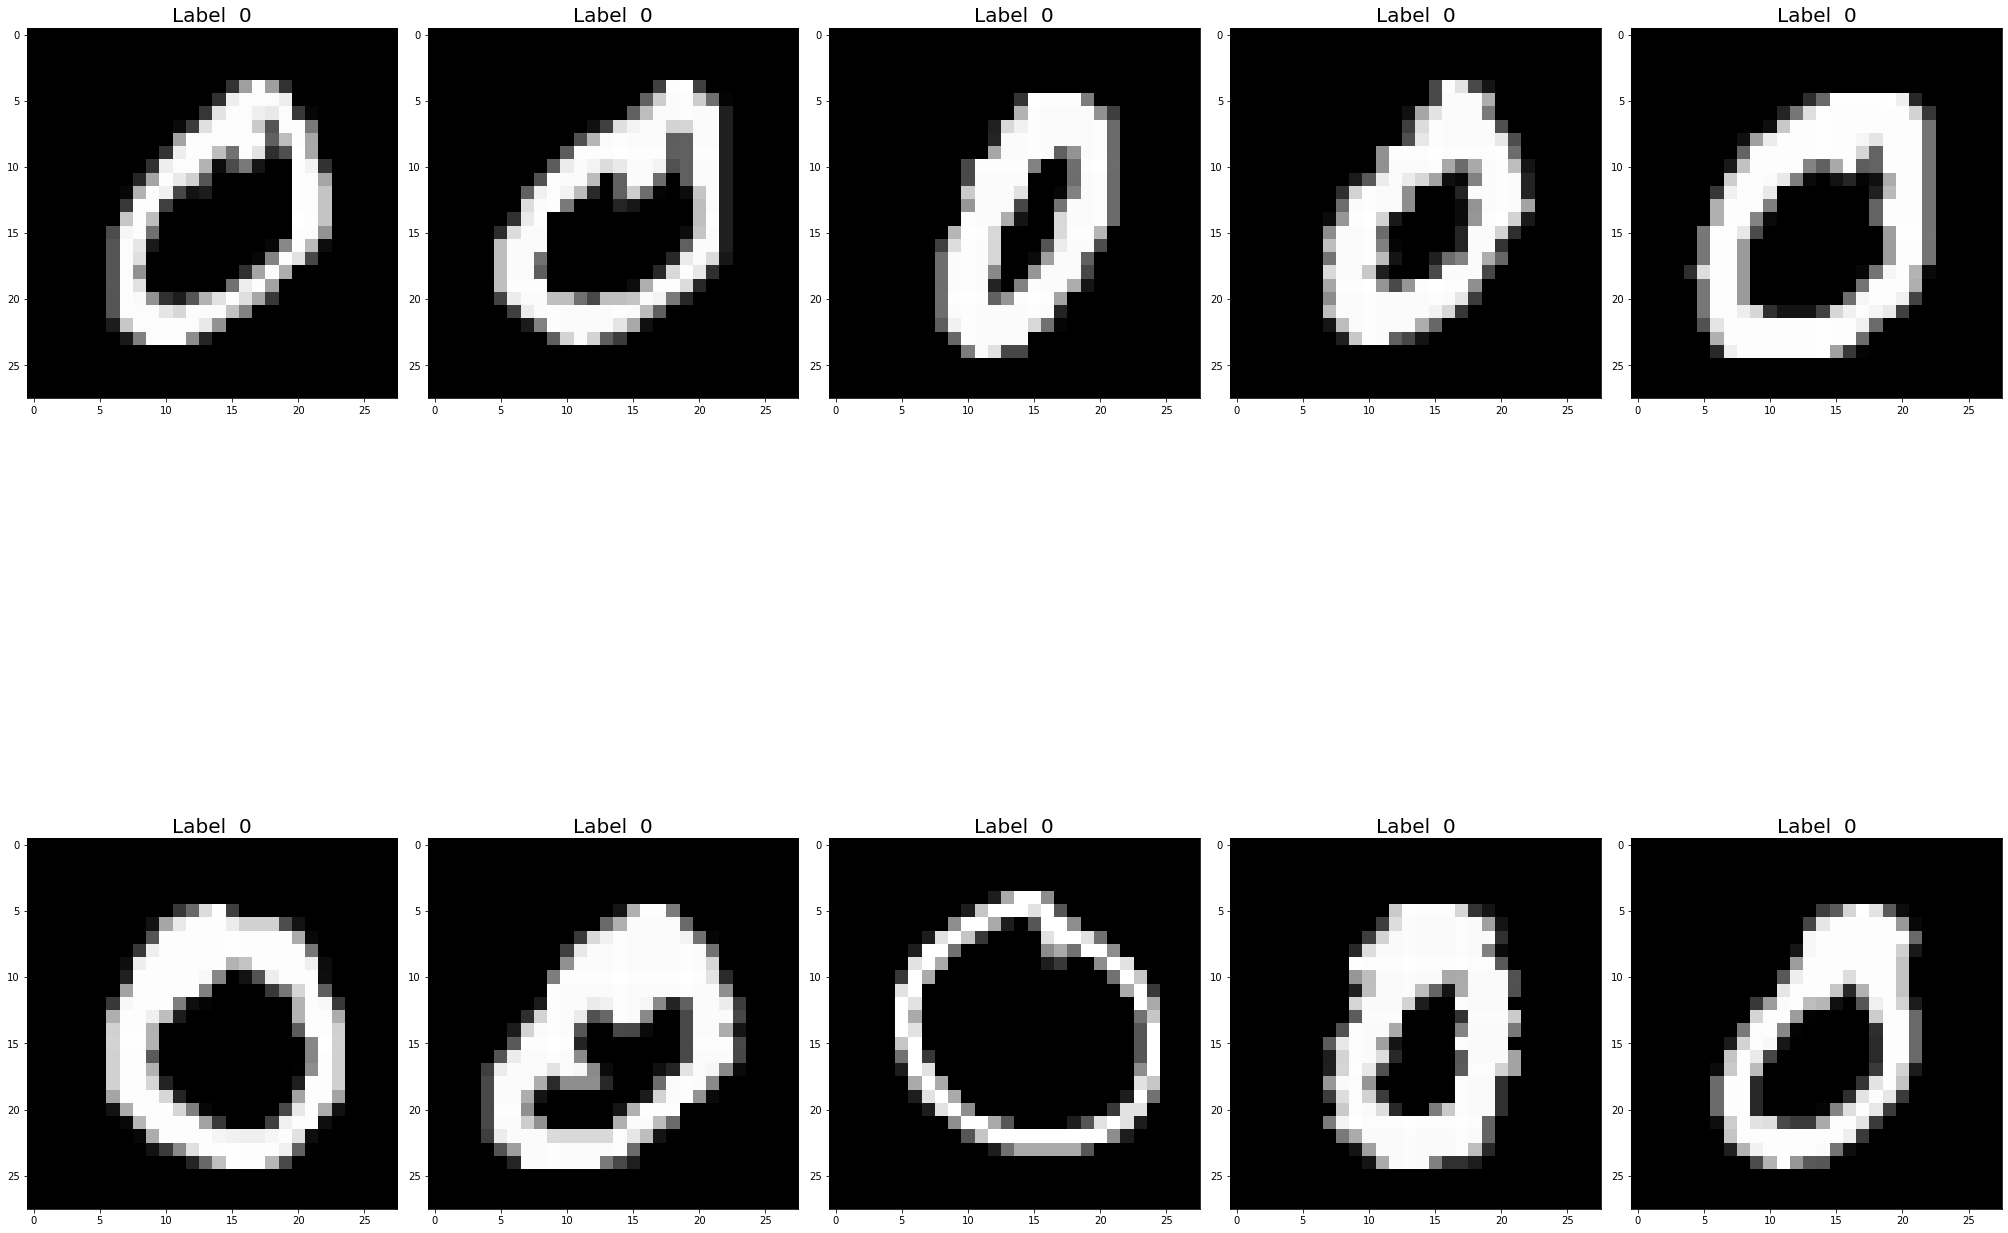

For Class: 1


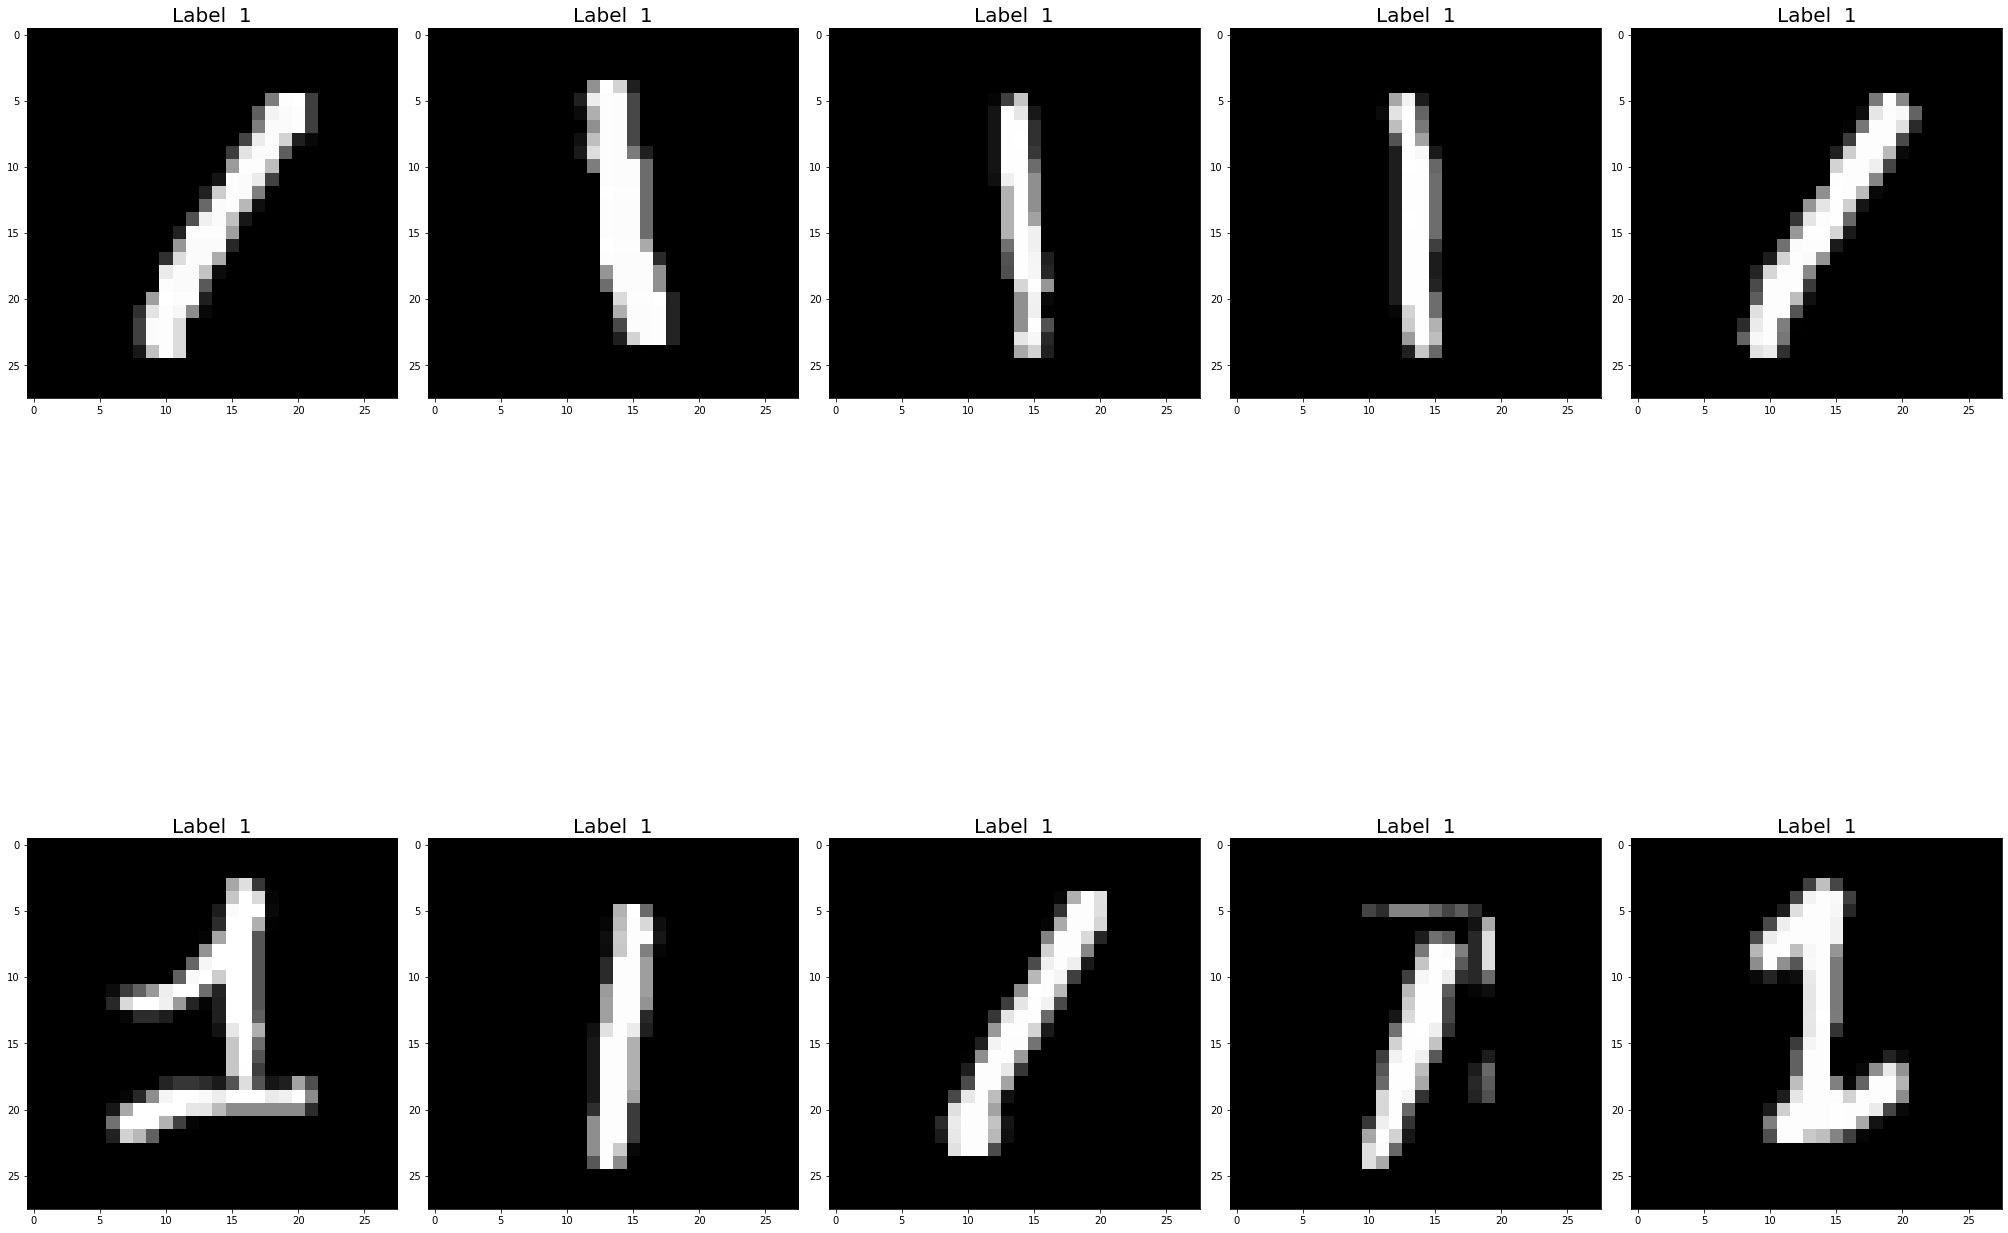

For Class: 2


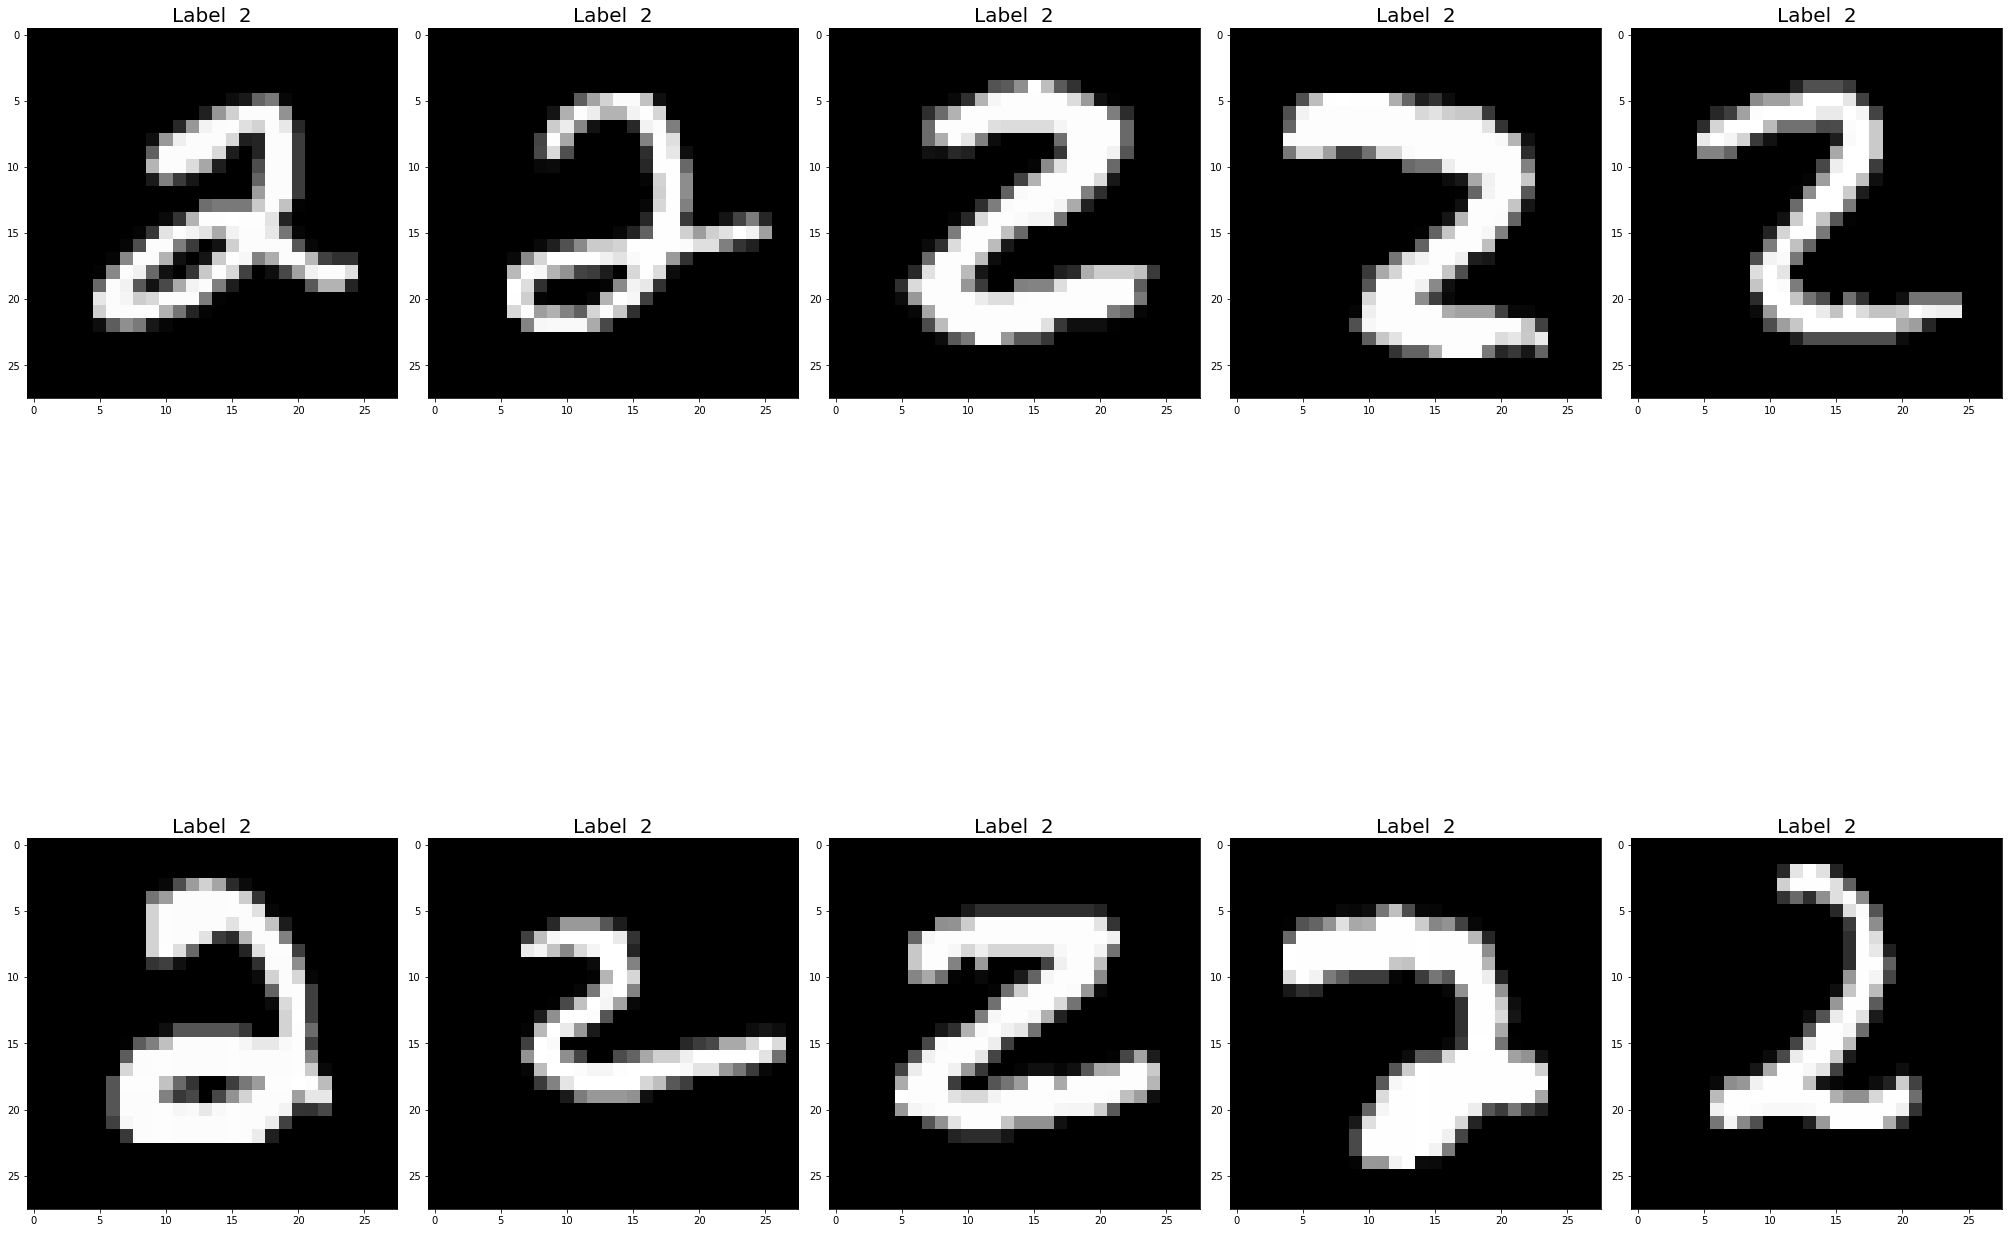

For Class: 3


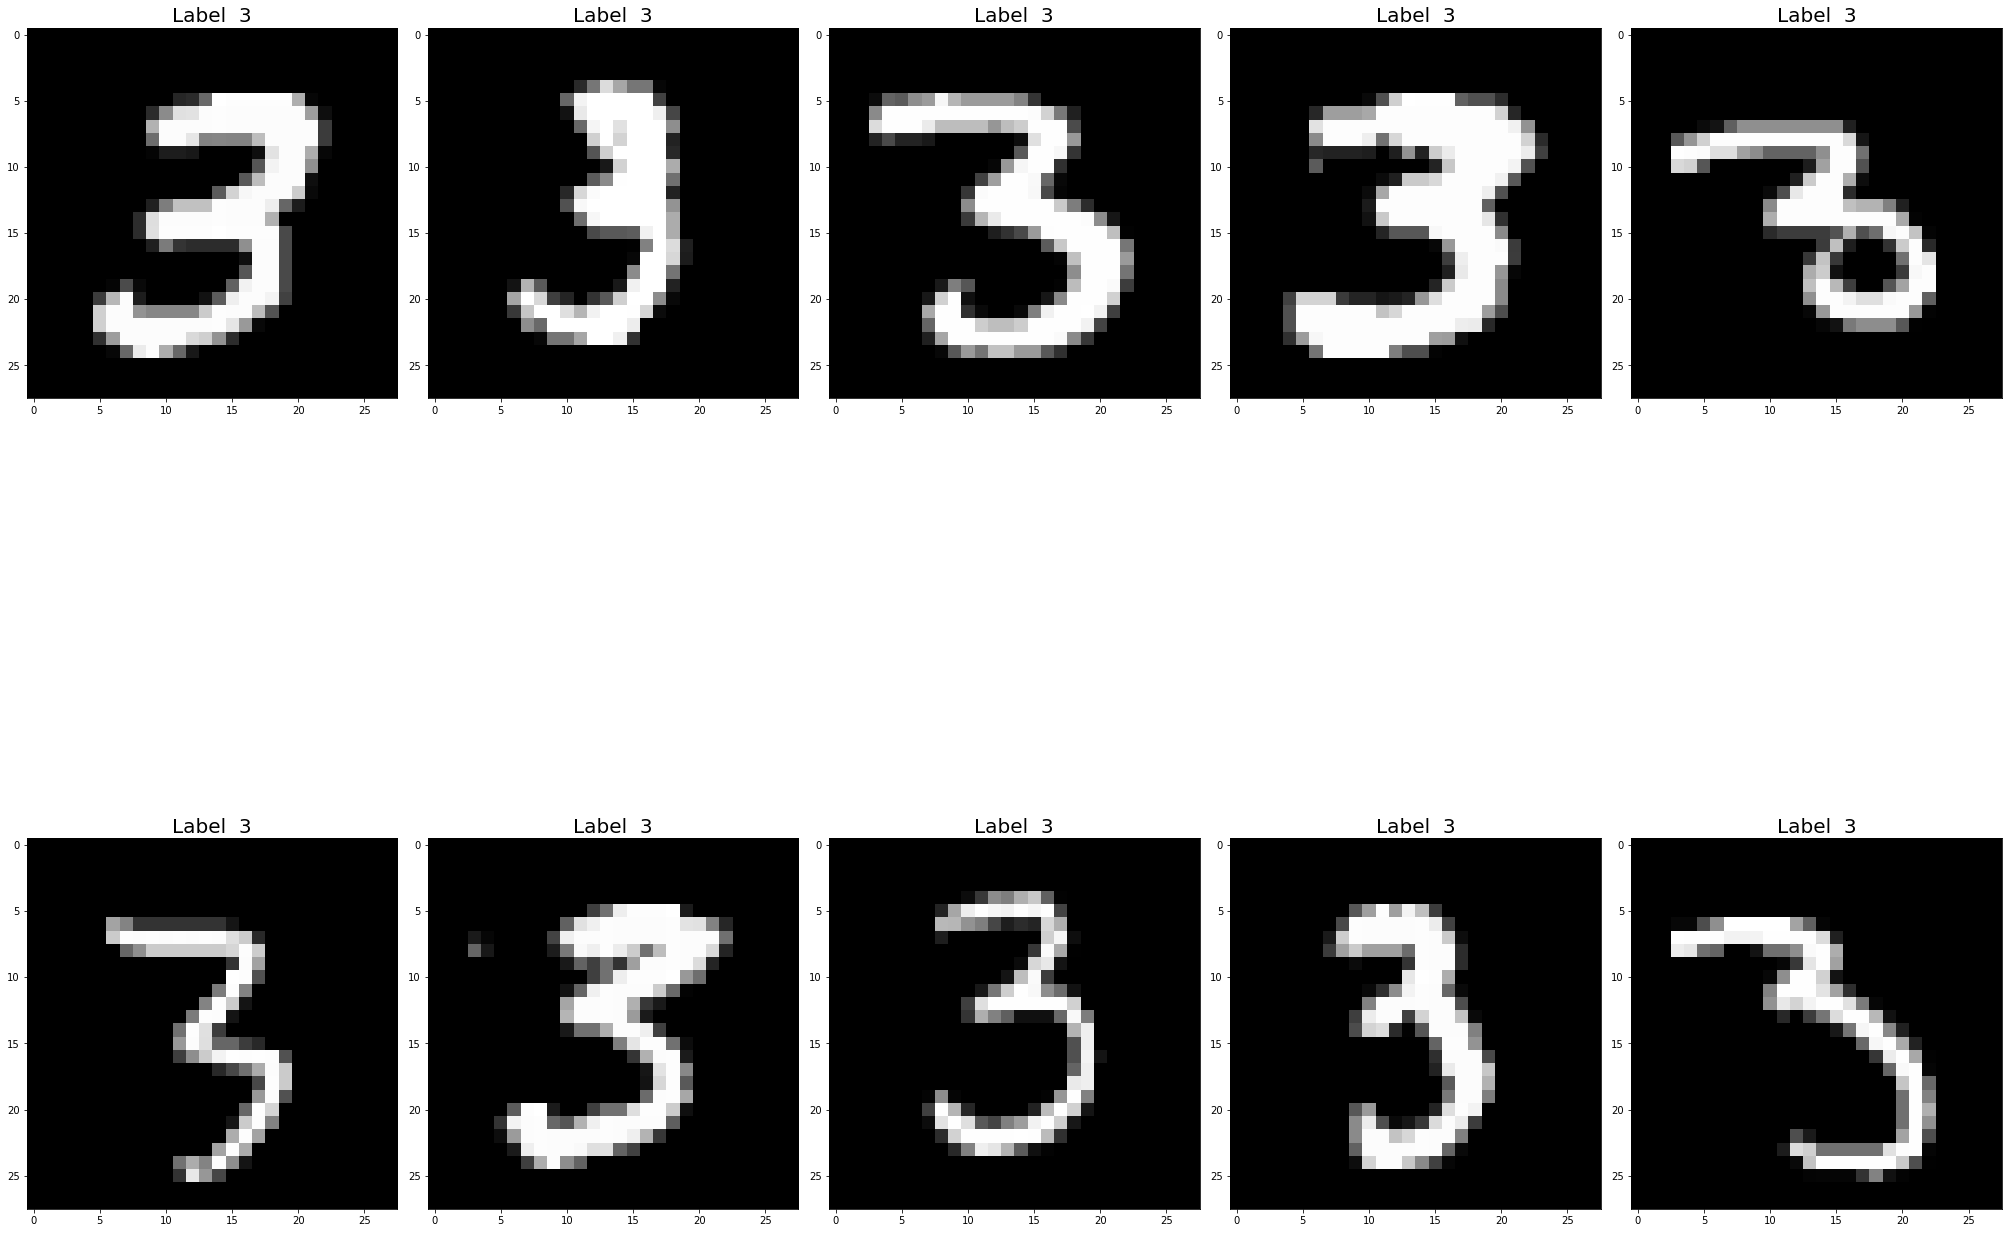

For Class: 4


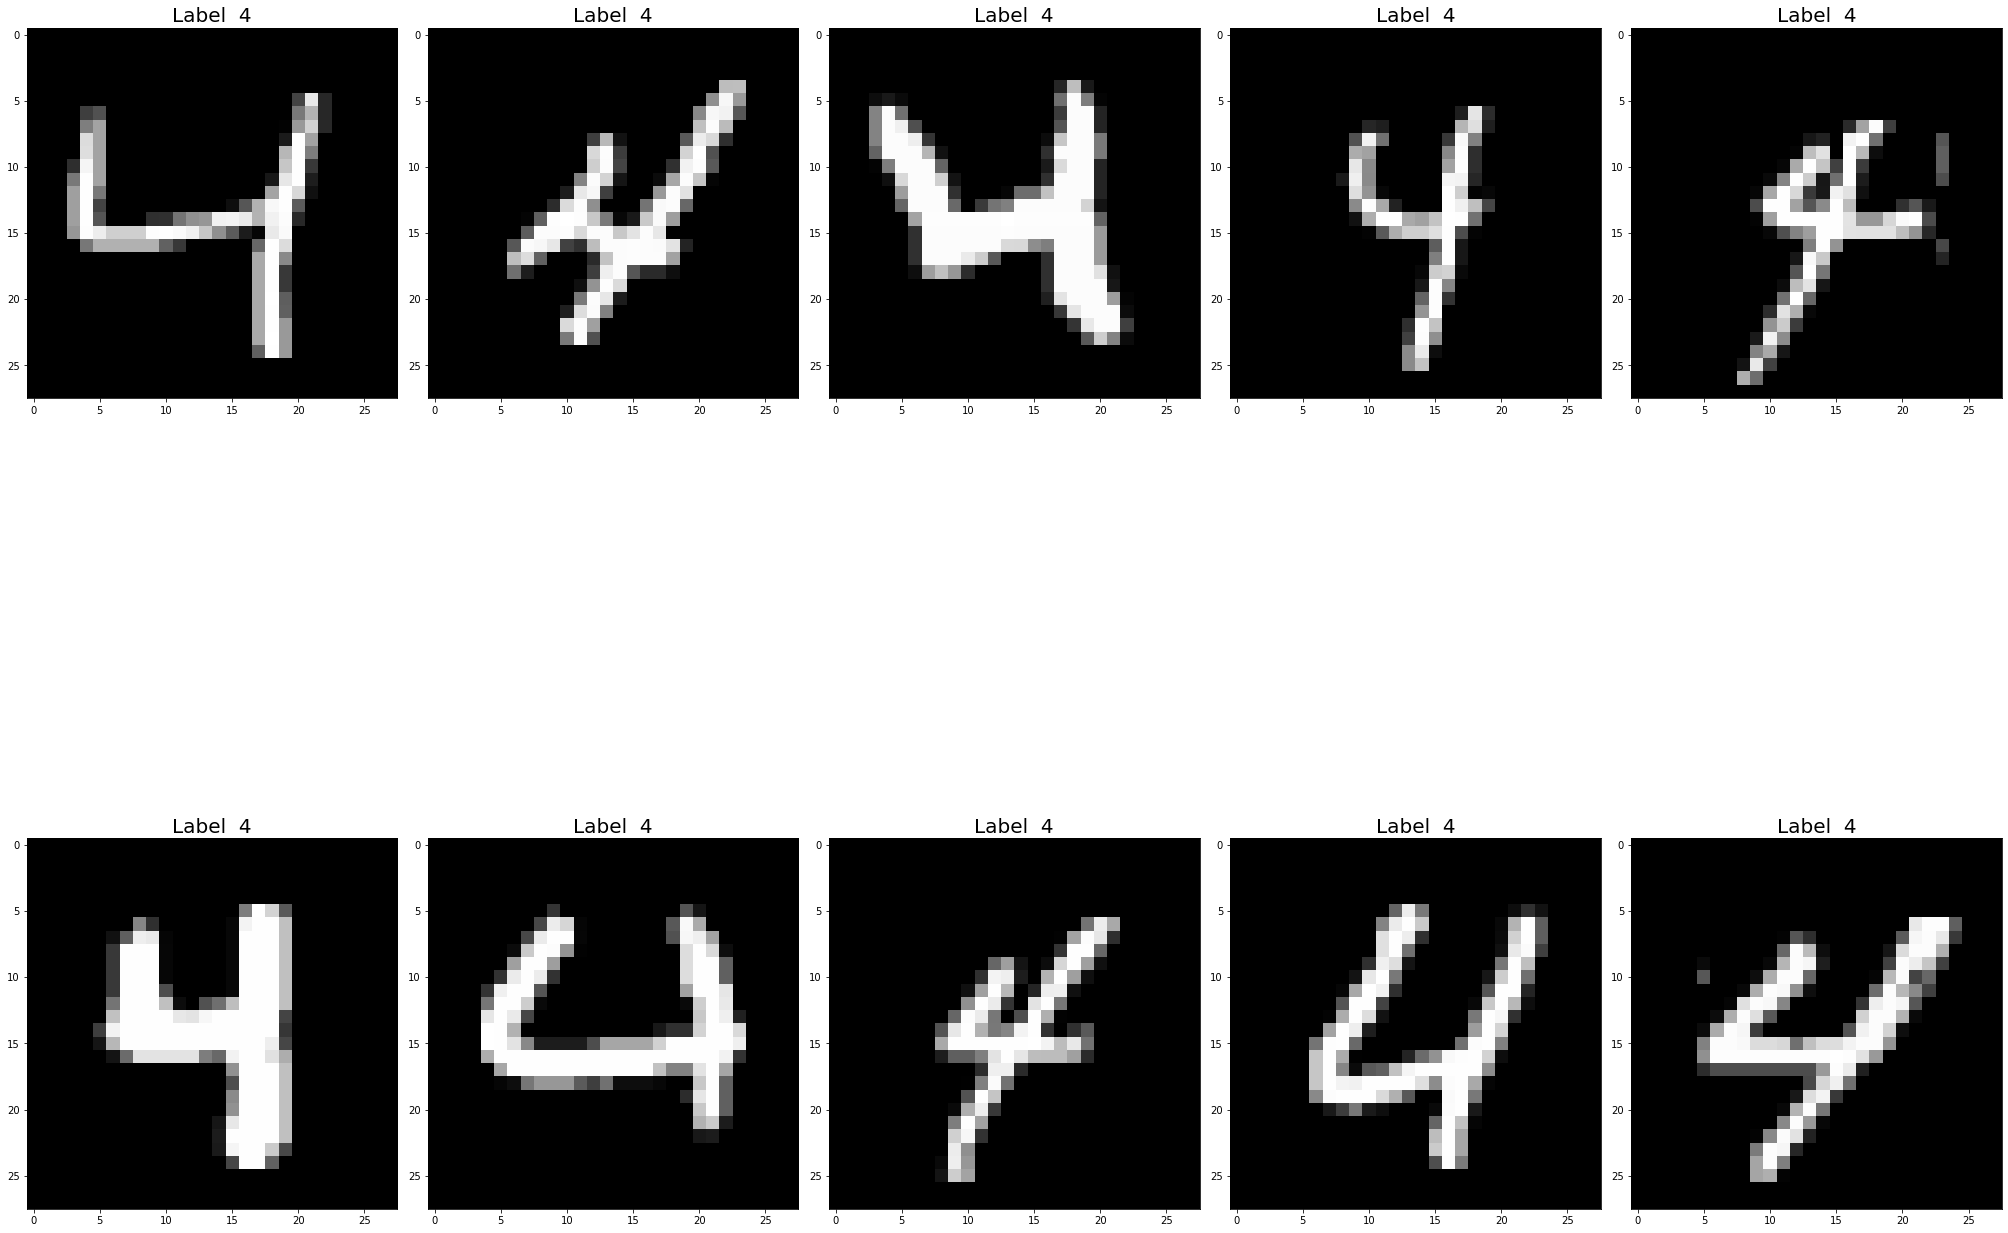

For Class: 5


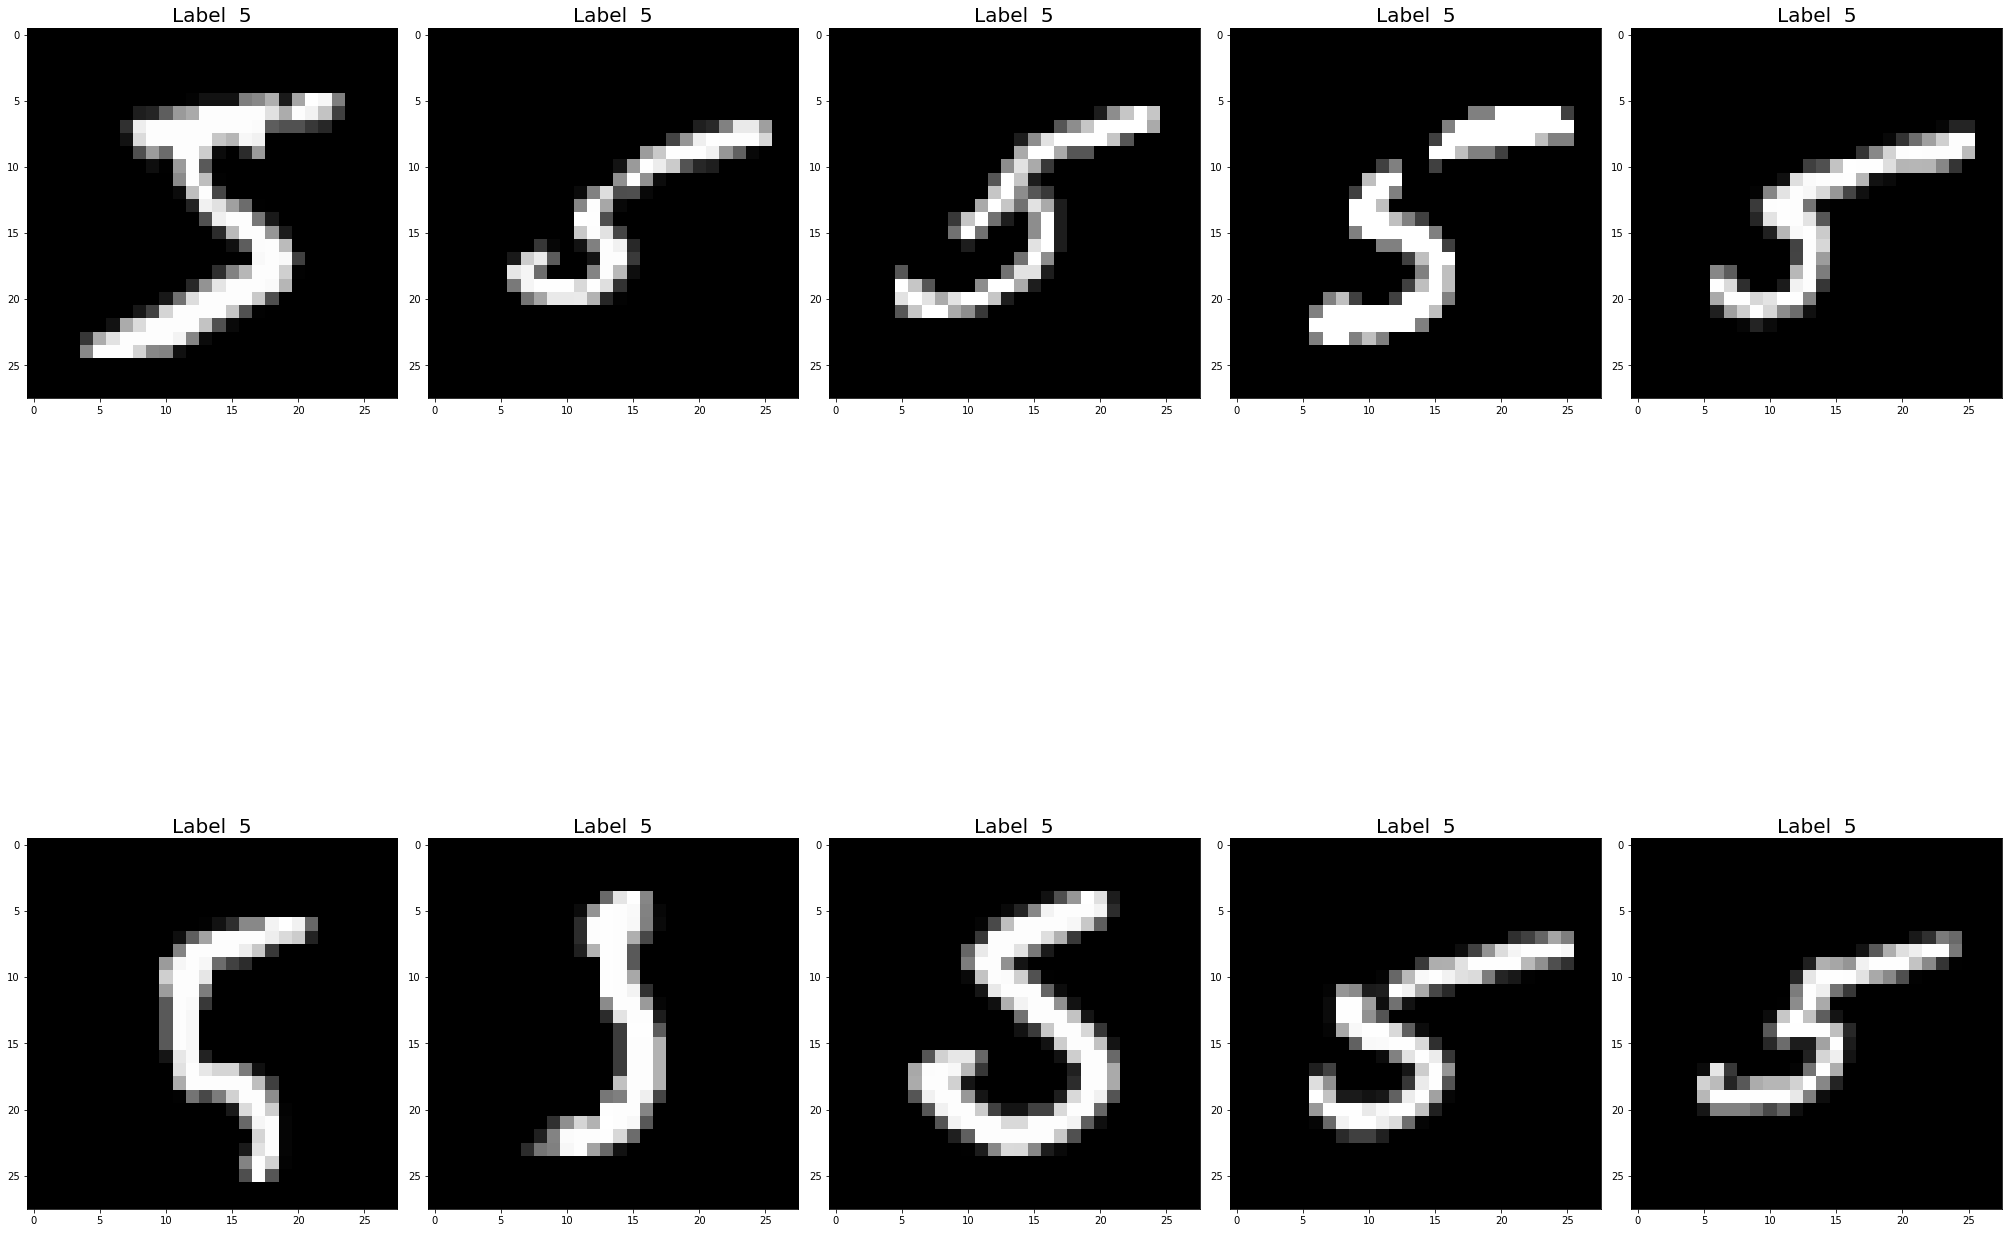

For Class: 6


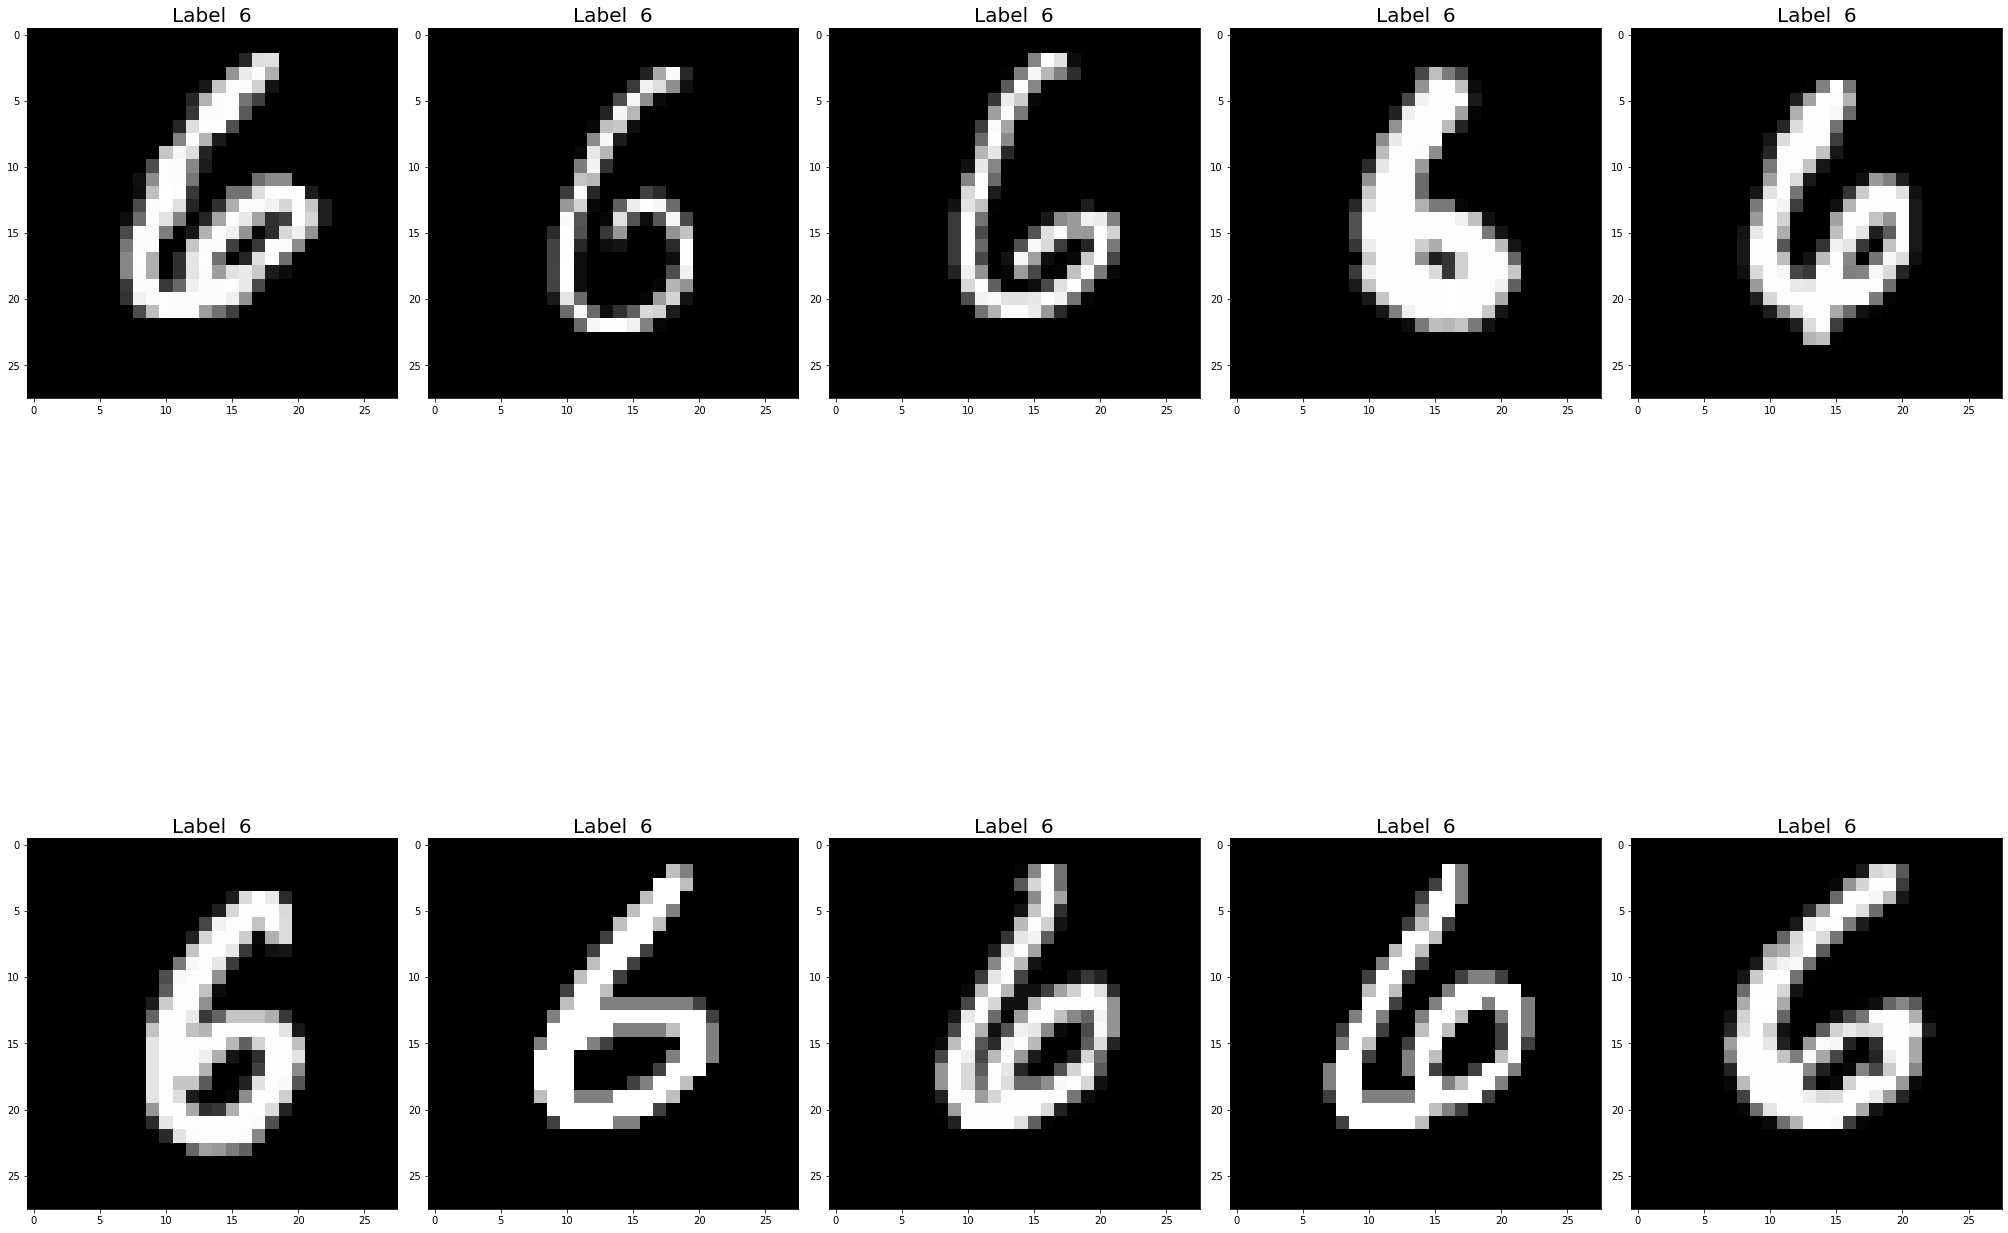

For Class: 7


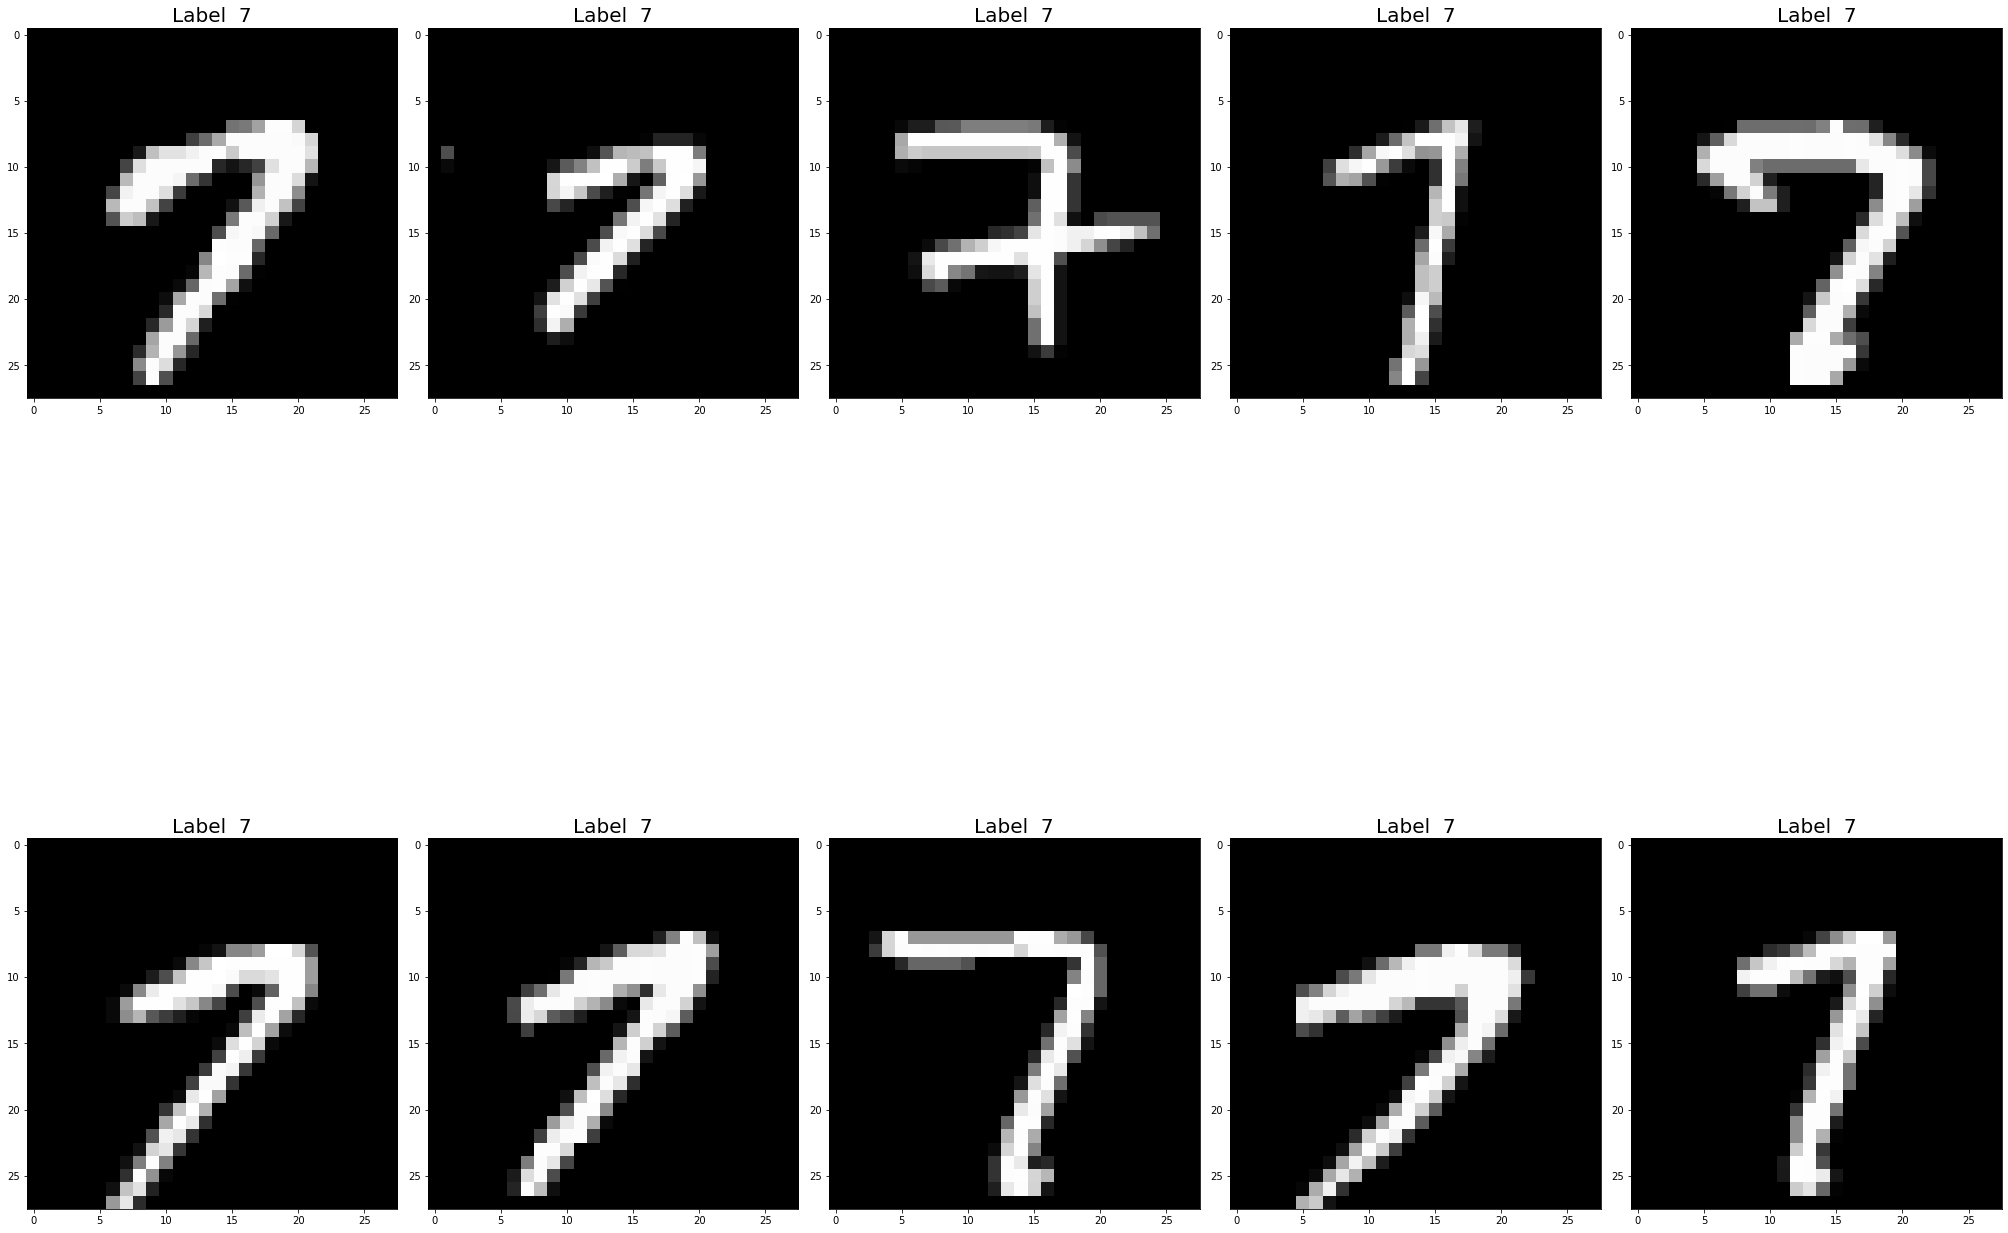

For Class: 8


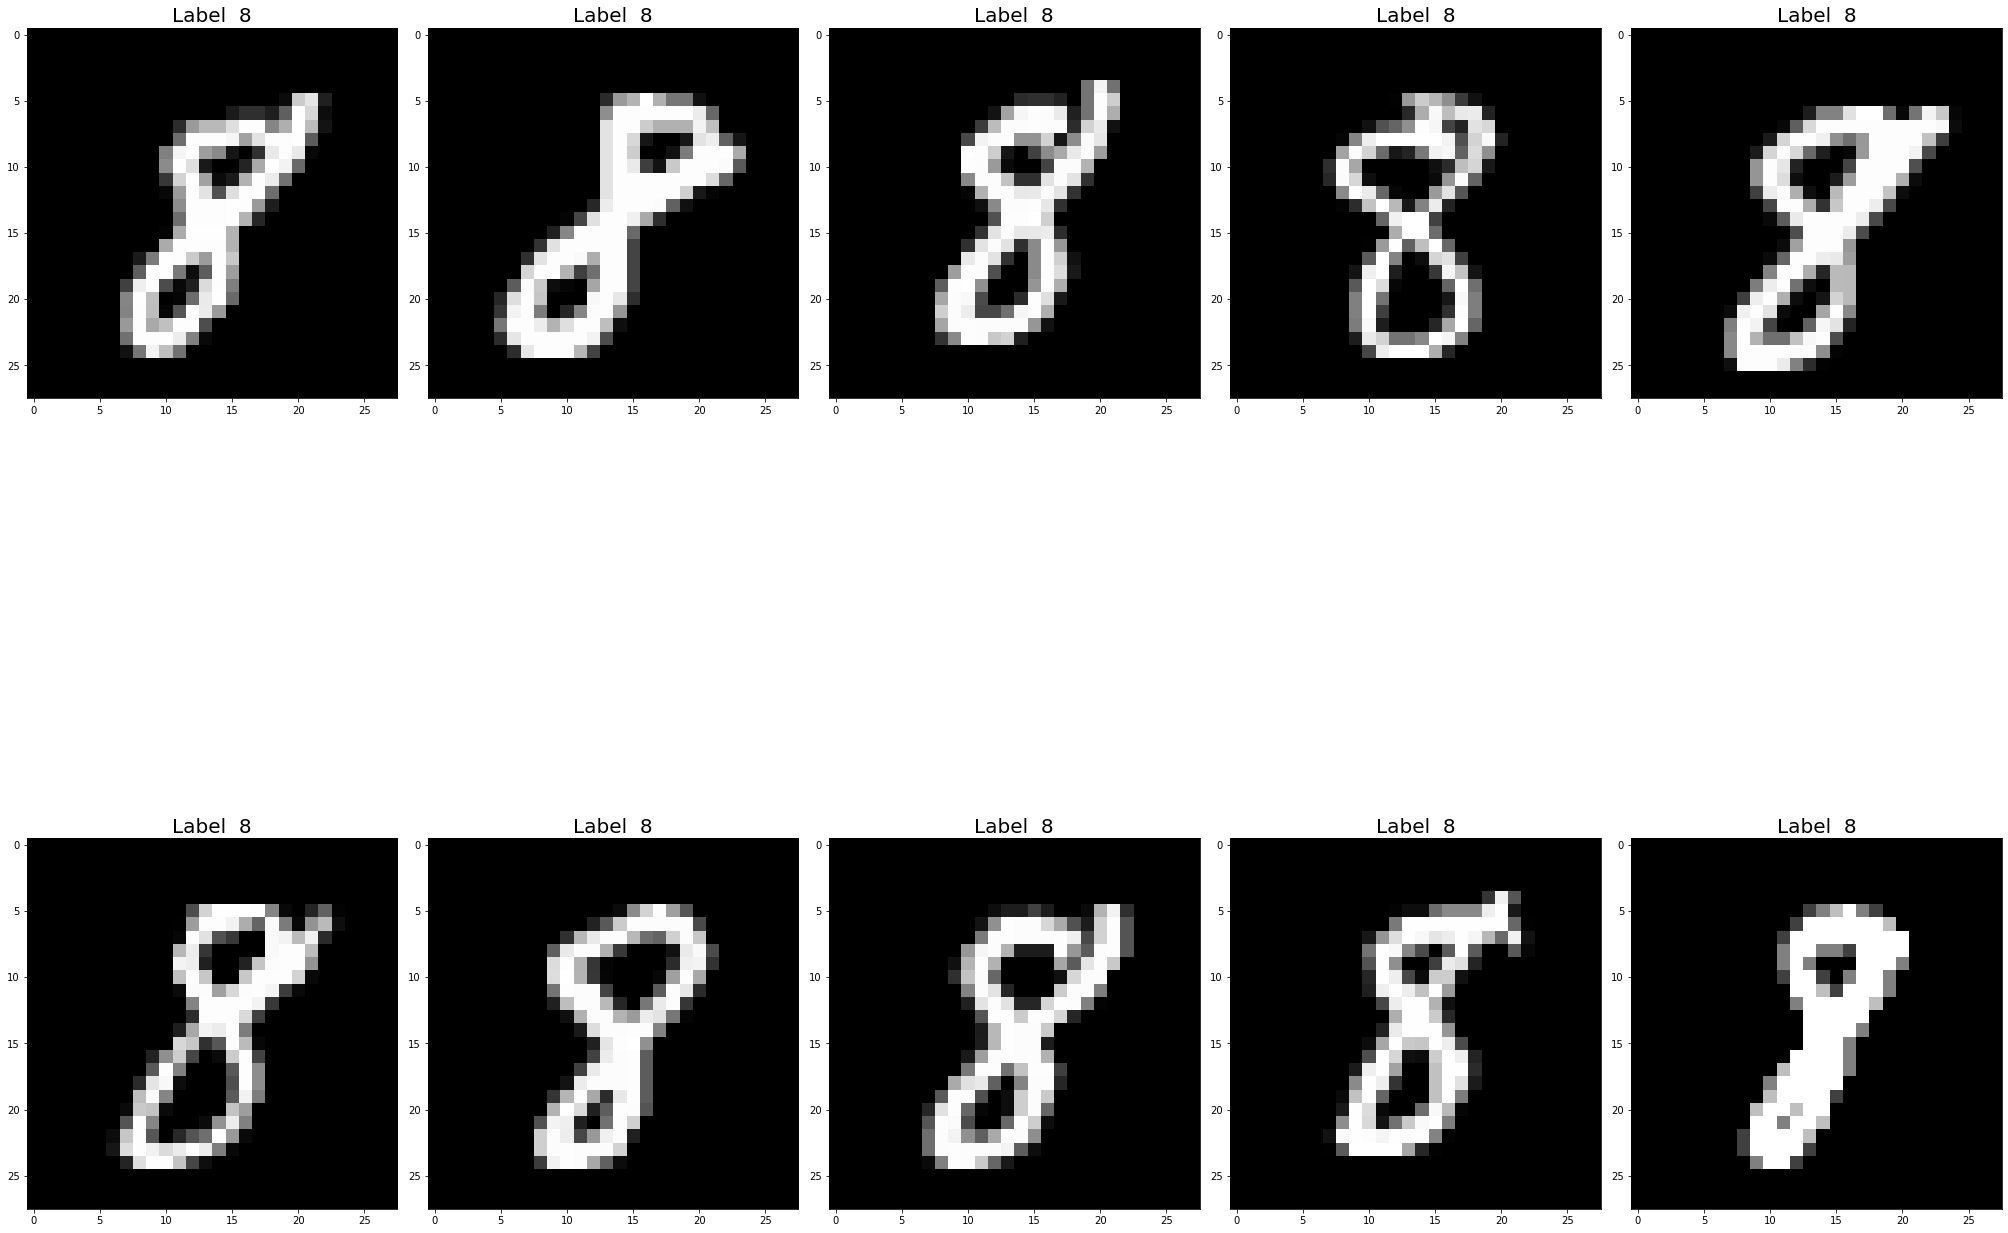

For Class: 9


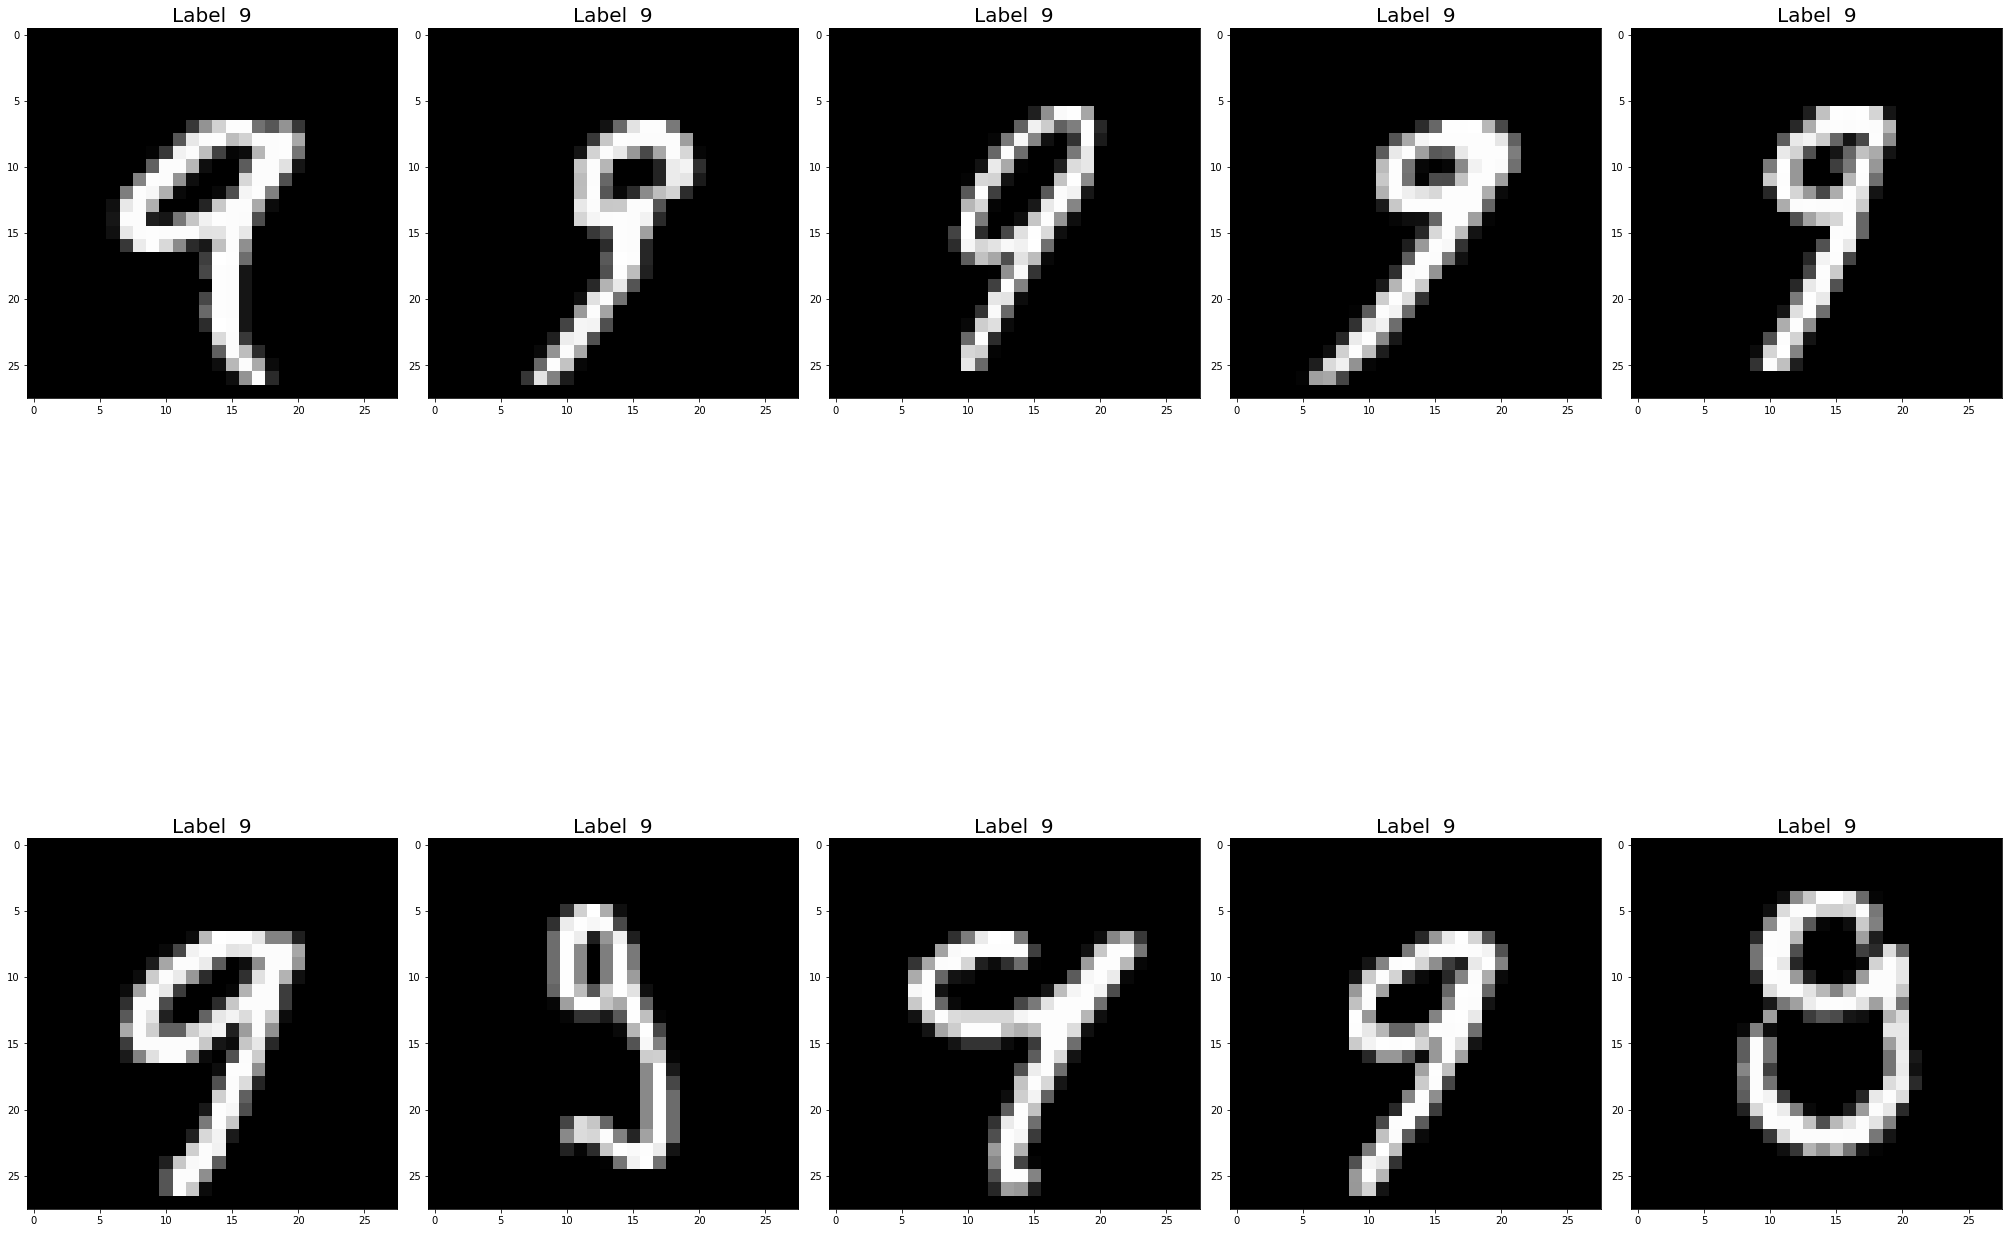

In [4]:
classes=np.unique(y_1)
print("Distinct classes",classes)

dataframe=pd.DataFrame(data=X_1)
dataframe['target']=y_1
dataframe.head(10)

for i in classes:
    print("For Class:",i)
    index= dataframe[dataframe['target']==i].index.tolist()[0:10]
    plotImage(index)

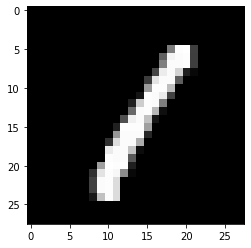

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 1.0 1.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.4 1.0 1.0 1.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.5 1.0 1.0 1.0 0.2 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.3 0.9 1.0 0.8 0.1 0.0 0.0 0.0 

In [5]:
#1. every image is an array of numbers describing how dark each pixel is.
temp=X_1[3].reshape(28,28)
imgplot = plt.imshow(temp,cmap='gray')
plt.show()
k=0
for i in range(len(temp)):
    for j in range(len(temp[0])):
        print('%.1f'%(temp[i][j]),end =" ")
        k+=1
    print("")

In [6]:
# 2. Max and Min value of ecah pixel
print("Data type of X:", X_1.dtype)
print("Data min:", np.amin(X_1[1]))
print("Data max:", np.amax(X_1[1]))

# 3. Datatype of Label
print("Data type of Label:", y_1.dtype)

Data type of X: float32
Data min: 0.0
Data max: 0.99609375
Data type of Label: int64


<ipython-input-7-9c6d5e439c30>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


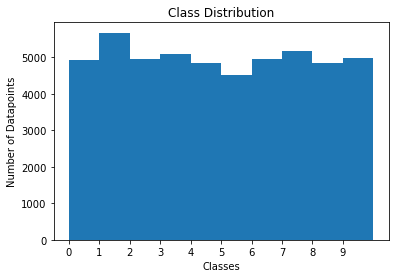

In [7]:
# 4. Class Distribution
fig,ax = plt.subplots()
ax.hist(y_1,bins=range(11))
ax.set_xticks(range(10))
ax.set_title("Class Distribution")
ax.set_xlabel('Classes')
ax.set_ylabel('Number of Datapoints')
fig.show()

# b.

Distinct classes [0 1 2 3]


Text(0.5, 1.0, 'Class Distribution Dataset 2')

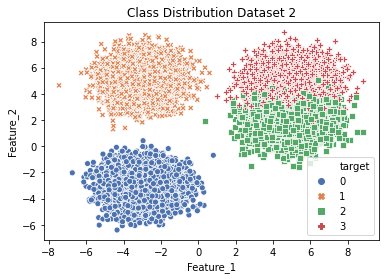

In [8]:
classes_2=np.unique(y_2)
print("Distinct classes",classes_2)

colors = ['red','green','blue','purple']
dataframe_2=pd.DataFrame(data=X_2,columns=['Feature_1','Feature_2'])
dataframe_2['target']=y_2
sns.scatterplot(data=dataframe_2, x=dataframe_2.iloc[:,0],y=dataframe_2.iloc[:,1], hue=dataframe_2['target'],style=dataframe_2['target'],palette="deep",legend="full").set_title('Class Distribution Dataset 2')


# c.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 18.592s...
[t-SNE] Computed neighbors for 50000 samples in 7001.652s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities fo

Text(0.5, 1.0, 'TSNE 2-D Plot')

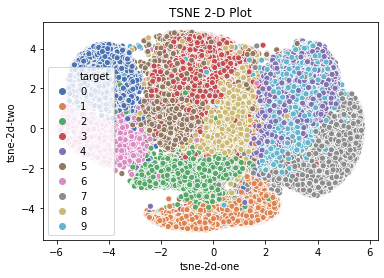

In [9]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dataframe.iloc[:,:-1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_subset=pd.DataFrame()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
sns.scatterplot(data=df_subset, x=df_subset['tsne-2d-one'], y=df_subset['tsne-2d-two'], hue=dataframe['target'],palette="deep",legend="full").set_title('TSNE 2-D Plot')


# d.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 19.328s...
[t-SNE] Computed neighbors for 50000 samples in 3063.247s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities fo

AttributeError: 'Path3DCollection' object has no attribute 'set_title'

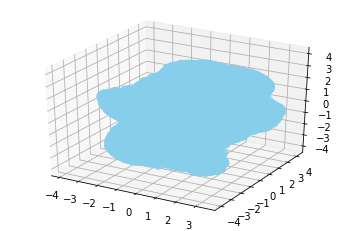

In [10]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(dataframe.iloc[:,:-1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_subset_1=pd.DataFrame()
df_subset_1['tsne-2d-one'] = tsne_results[:,0]
df_subset_1['tsne-2d-two'] = tsne_results[:,1]
df_subset_1['tsne-2d-three'] = tsne_results[:,2]


In [ ]:
# gif plot
# fig = px.scatter_3d(df_subset_1, x='tsne-2d-one', y='tsne-2d-two', z='tsne-2d-three',
#               color=y_1)
# fig.show()

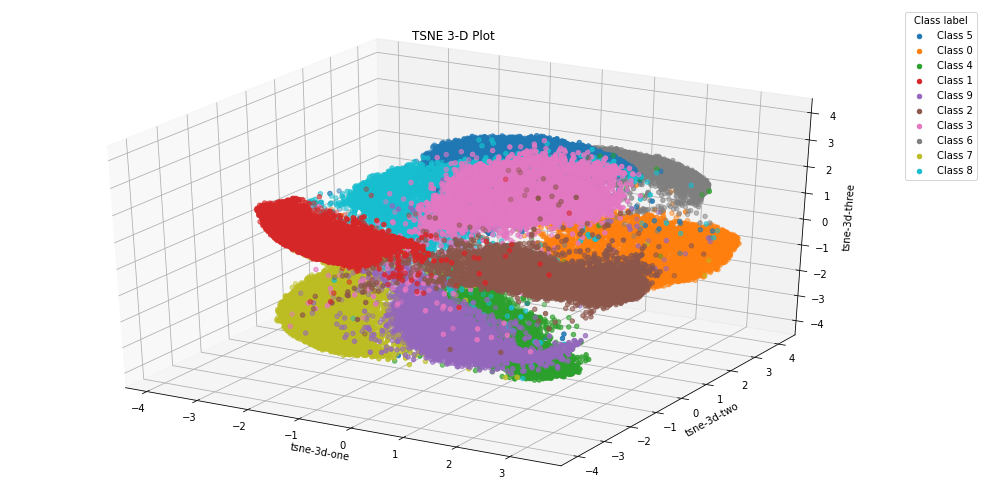

In [94]:
df_subset_1['target']=dataframe['target']
fig = plt.figure(figsize = (16, 9))
target_label=df_subset_1['target'].unique()
ax = fig.add_subplot(111, projection='3d')   
for l in target_label:
    x_axis=[]
    y_axis=[]
    z_axis=[]   
    df = df_subset_1[df_subset_1['target'] == l]
    x_axis = df['tsne-2d-one'].tolist()
    y_axis = df['tsne-2d-two'].tolist()
    z_axis = df['tsne-2d-three'].tolist()
    ax.scatter(x_axis,y_axis,z_axis,label='Class '+str(l) )
ax.legend( title = 'Class label', bbox_to_anchor = (1,1), loc="upper left")
ax.set_xlabel('tsne-3d-one')
ax.set_ylabel('tsne-3d-two')
ax.set_zlabel('tsne-3d-three')
plt.title('TSNE 3-D Plot')
plt.show()

# Question 2

In [132]:
# train and test split

def train_test_split(X,y,split):
    train_X=list()
    train_y=list()
    test_X=list(X)
    test_y=list(y)
    train_size=split*len(X)
    while len(train_X)<train_size:
        i=randrange(len(test_X))
        train_X.append(test_X.pop(i))
        train_y.append(test_y.pop(i))
    return train_X,train_y,test_X,test_y

split=0.70
train_X,train_y,test_X,test_y=train_test_split(X_2,y_2,split)
print("Length of train X:",len(train_X))
print("Length of train y:",len(train_y))
print("Length of test X:",len(test_X))
print("Length of test y:",len(test_y))

Length of train X: 14000
Length of train y: 14000
Length of test X: 6000
Length of test y: 6000


In [133]:
# accuracy function
def accuracy(predicted_test_y,test_y):
    count=0
    for i in range(len(predicted_test_y)):
        if(predicted_test_y[i]==test_y[i]):
            count+=1
    return count/len(predicted_test_y)
        

In [134]:

scoring=accuracy

clf = DecisionTreeClassifier()
clf.fit(train_X,train_y)
predicted_test_y=clf.predict(test_X)
predicted_train_y=clf.predict(train_X)

train_acc=scoring(predicted_train_y,train_y)
test_acc=scoring(predicted_test_y,test_y)

print(" Train Accuracy:"+"{:.5f}".format(train_acc))
print(" Test Accuracy:"+"{:.5f}".format(test_acc))

 Train Accuracy:1.00000
 Test Accuracy:0.94867


In [135]:
def plot(X,y,label,color):
    plt.plot(X, y,'o-', color=color,label=label) 
    plt.xlabel('Depth_of_Tree') 
    plt.ylabel('Accuracy Score') 
    plt.title('Accuracy vs Depth_of_Tree') 
    plt.xticks(X,X)
    plt.legend()

# a. & b. & c

In [136]:
#Grid Search Algoithm
def gridSearch(max_depth,criterion,train_X,train_y,test_X,test_y):
    max_list_acc=list()
    test_list_acc=list()
    train_list_acc=list()
    max_list_score=list()
    test_list_score=list()
    train_list_score=list()
    for i  in max_depth:
            clf=DecisionTreeClassifier(max_depth=i,criterion=criterion)
            clf.fit(train_X,train_y)
            predicted_test_y=clf.predict(test_X)
            predicted_train_y=clf.predict(train_X)
            train_acc=accuracy(predicted_train_y,train_y)
            test_acc=accuracy(predicted_test_y,test_y)
            train_acc_score=accuracy_score(predicted_train_y,train_y)
            test_acc_score=accuracy_score(predicted_test_y,test_y)
            max_list_acc.append(i)
            test_list_acc.append(test_acc)
            train_list_acc.append(train_acc)
            max_list_score.append(i)
            test_list_score.append(test_acc_score)
            train_list_score.append(train_acc_score)
#             print("{:.5f}".format(i)+"             "+"{:.5f}".format(train_acc)+"             " +"{:.5f}".format(test_acc))
    return max_list_acc,test_list_acc,train_list_acc,max_list_score,test_list_score,train_list_score





 For Accracy implemented by me


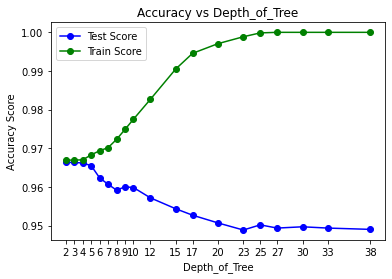

                       Score                          
Depth_Of_Tree       Train_Accuracy       Test_Accuracy       
2             0.96693             0.96633
3             0.96693             0.96633
4             0.96700             0.96617
5             0.96829             0.96550
6             0.96936             0.96233
7             0.97014             0.96067
8             0.97229             0.95917
9             0.97486             0.96000
10             0.97750             0.95983
12             0.98264             0.95717
15             0.99050             0.95433
17             0.99457             0.95267
20             0.99707             0.95067
23             0.99886             0.94883
25             0.99986             0.95017
27             1.00000             0.94933
30             1.00000             0.94967
33             1.00000             0.94933
38             1.00000             0.94900
 For Accracy Score


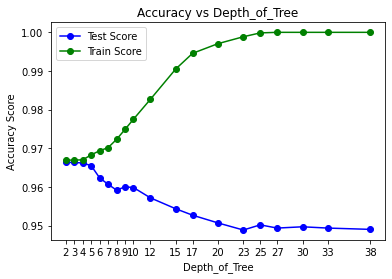

                       Score                          
Depth_Of_Tree       Train_Accuracy       Test_Accuracy       
2             0.96693             0.96633
3             0.96693             0.96633
4             0.96700             0.96617
5             0.96829             0.96550
6             0.96936             0.96233
7             0.97014             0.96067
8             0.97229             0.95917
9             0.97486             0.96000
10             0.97750             0.95983
12             0.98264             0.95717
15             0.99050             0.95433
17             0.99457             0.95267
20             0.99707             0.95067
23             0.99886             0.94883
25             0.99986             0.95017
27             1.00000             0.94933
30             1.00000             0.94967
33             1.00000             0.94933
38             1.00000             0.94900


In [138]:
max_depth=[2,3,4,5,6,7,8,9,10,12,15,17,20,23,25,27,30,33,38]
criterion='gini'
label=['Test Score','Train Score']
colour=['b','g']
max_list_acc,test_list_acc,train_list_acc,max_list_score,test_list_score,train_list_score=gridSearch(max_depth,criterion,train_X,train_y,test_X,test_y)


print(" For Accracy implemented by me")

# plot of accuarcy
y_acc=[test_list_acc,train_list_acc]
X_acc=[max_list_acc,max_list_acc]
for i in range(len(label)):
    plot(X_acc[i],y_acc[i],label[i],colour[i])
plt.show()

print("============================================================")
print("                       Score                          ")
print("============================================================")
print("Depth_Of_Tree       Train_Accuracy       Test_Accuracy       ")
print("============================================================")
for i in range(len(max_list_acc)):
    print(str(max_list_score[i])+"             "+"{:.5f}".format(train_list_acc[i])+"             " +"{:.5f}".format(test_list_acc[i]))

# plot of accuarcy score

print(" For Accracy Score")


y_acc=[test_list_score,train_list_score]
X_acc=[max_list_score,max_list_score]
for i in range(len(label)):
    plot(X_acc[i],y_acc[i],label[i],colour[i])
plt.show()



print("============================================================")
print("                       Score                          ")
print("============================================================")
print("Depth_Of_Tree       Train_Accuracy       Test_Accuracy       ")
print("============================================================")
for i in range(len(max_list_score)):
    print(str(max_list_score[i])+"             "+"{:.5f}".format(train_list_score[i])+"             " +"{:.5f}".format(test_list_score[i]))
    
    
    

# Question 3

In [139]:
# Loading the dataset

df=pd.read_csv('PM_Dataset.csv')
df=df.iloc[:,1:] #leaving the No column as it is just the SL.NO

temp=df['month'] #Placing the month column to the last just for clarity
df=df.drop(['month'],axis=1)
df['month']=temp

nan_cols = [i for i in df.columns if df[i].isnull().any()] #Checking what all columns are null
print("Null Columns:",nan_cols)
df=df.fillna(method='bfill') #Filling nan columns for next futre values

print(df.head())
print("Shape of Dataset:",df.shape)

Null Columns: ['pm2.5']
   year  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir  month
0  2010    1     0  129.0   -21 -11.0  1021.0   NW   1.79   0   0      1
1  2010    1     1  129.0   -21 -12.0  1020.0   NW   4.92   0   0      1
2  2010    1     2  129.0   -21 -11.0  1019.0   NW   6.71   0   0      1
3  2010    1     3  129.0   -21 -14.0  1019.0   NW   9.84   0   0      1
4  2010    1     4  129.0   -20 -12.0  1018.0   NW  12.97   0   0      1
Shape of Dataset: (43824, 12)


In [140]:
#Checking for imbalance in the dataste

(unique, counts) = np.unique(df['month'], return_counts=True)
print(unique)
print(counts)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[3720 3384 3720 3600 3720 3600 3720 3720 3600 3720 3600 3720]


In [141]:
# Train and test split into 80 to 20 ratio

split=0.80
X=df.iloc[:,:-1] #Reading feature set
X['cbwd']=pd.factorize(X.cbwd)[0] + 1 # As DT deals with digits need to convert the cbwd column to numbers
print(X.head())
y=df['month'] #Reading Y values
train_X,train_y,test_X,test_y=train_test_split(np.asarray(X),y,split)
print("Length of train X:",len(train_X))
print("Length of train y:",len(train_y))
print("Length of test X:",len(test_X))
print("Length of test y:",len(test_y))

   year  day  hour  pm2.5  DEWP  TEMP    PRES  cbwd    Iws  Is  Ir
0  2010    1     0  129.0   -21 -11.0  1021.0     1   1.79   0   0
1  2010    1     1  129.0   -21 -12.0  1020.0     1   4.92   0   0
2  2010    1     2  129.0   -21 -11.0  1019.0     1   6.71   0   0
3  2010    1     3  129.0   -21 -14.0  1019.0     1   9.84   0   0
4  2010    1     4  129.0   -20 -12.0  1018.0     1  12.97   0   0
Length of train X: 35060
Length of train y: 35060
Length of test X: 8764
Length of test y: 8764


# a.

In [142]:
# Gini and Entropy
criterion=['gini','entropy']
scoring=accuracy
for i in criterion:
    clf=DecisionTreeClassifier(criterion=i)
    clf.fit(train_X,train_y)
    predicted_test_y=clf.predict(test_X)
    predicted_train_y=clf.predict(train_X)

    train_acc=accuracy(predicted_train_y,train_y)
    test_acc=accuracy(predicted_test_y,test_y)

    print(" Train Accuracy:"+"{:.5f}".format(train_acc))
    print(" Test Accuracy:"+"{:.5f}".format(test_acc))
    
#NOTE: The best test accuarcy is for Entropy as criteria for splitting

 Train Accuracy:1.00000
 Test Accuracy:0.82999
 Train Accuracy:1.00000
 Test Accuracy:0.84482


 # b.

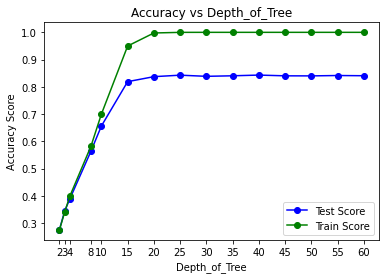

                       Score                          
Depth_Of_Tree       Train_Accuracy       Test_Accuracy       
2             0.27547             0.27681
3             0.34087             0.34493
4             0.40029             0.39012
8             0.58206             0.56401
10             0.70029             0.65666
15             0.94986             0.81926
20             0.99763             0.83752
25             0.99991             0.84299
30             1.00000             0.83877
35             1.00000             0.84071
40             1.00000             0.84334
45             1.00000             0.84060
50             1.00000             0.84037
55             1.00000             0.84174
60             1.00000             0.84094


In [143]:
max_depth=[2,3, 4, 8, 10, 15,20,25,30,35,40,45,50,55,60]
criterion='entropy'
max_list_acc,test_list_acc,train_list_acc,max_list_score,test_list_score,train_list_score=gridSearch(max_depth,criterion,train_X,train_y,test_X,test_y)


# plot of accuarcy
y_acc=[test_list_acc,train_list_acc]
X_acc=[max_list_acc,max_list_acc]
for i in range(len(label)):
    plot(X_acc[i],y_acc[i],label[i],colour[i])
plt.show()

print("============================================================")
print("                       Score                          ")
print("============================================================")
print("Depth_Of_Tree       Train_Accuracy       Test_Accuracy       ")
print("============================================================")
for i in range(len(max_list_acc)):
    print(str(max_list_score[i])+"             "+"{:.5f}".format(train_list_acc[i])+"             " +"{:.5f}".format(test_list_acc[i]))

# c.

In [144]:
def votingScheme(results):
    temp=list()
    for i in range(len(results)):
        temp1=np.asarray(results.iloc[i,:])
        (unique, counts) = np.unique(temp1, return_counts=True)
        dictionary = dict(zip(unique,counts))
        temp.append(max(dictionary, key=dictionary.get) )
    results['Label']=temp
    return results
    
def ensembleDecision(n,split,train_X,train_y,test_X,test_y,max_depth):
    results_test=pd.DataFrame()
    results_train=pd.DataFrame()
    for i in range(n):
        clf=DecisionTreeClassifier(max_depth=max_depth)
        X_train,y_train,_,_=train_test_split(train_X,train_y,split)
        clf.fit(X_train,y_train)
        predicted_test_y=clf.predict(test_X)
        predicted_train_y=clf.predict(train_X)
        results_test[i]=predicted_test_y
        results_train[i]=predicted_train_y
    results_test=votingScheme(results_test)
    results_train=votingScheme(results_train)
    train_acc=accuracy(results_train['Label'],train_y)
    test_acc=accuracy(results_test['Label'],test_y)
    print(str(max_depth)+"                     "+str(n)+"              "+str("{:.5f}".format(train_acc))+"                    "+str("{:.5f}".format(test_acc)))
        
n=100
split=0.5
max_depth=3
print("Depth_Of_Tree       Number_Of_Trees       Train_Accuracy       Test_Accuracy       ")
print("=====================================================================================")
ensembleDecision(n,split,train_X,train_y,test_X,test_y,max_depth)      


Depth_Of_Tree       Number_Of_Trees       Train_Accuracy       Test_Accuracy       
3                     100              0.35365                    0.35189


#### d. 

In [83]:
max_depth=[4, 8, 10, 15, 20,30]
num_trees=[1,10,20,30,40,50,60,70,80,90,100]
split=0.50
print("===================================================================================")
print("                       Score                          ")
print("===================================================================================")
print("Depth_Of_Tree       Number_Of_Trees       Train_Accuracy       Test_Accuracy       ")
print("====================================================================================")
for i in max_depth:
    for j in num_trees:
        ensembleDecision(j,split,train_X,train_y,test_X,test_y,i)

                       Score                          
Depth_Of_Tree       Number_Of_Trees       Train_Accuracy       Test_Accuracy       
4                     1              0.39495                    0.39286
4                     10              0.41951                    0.42241
4                     20              0.40770                    0.40838
4                     30              0.40245                    0.40438
4                     40              0.40294                    0.40176
4                     50              0.40799                    0.40564
4                     60              0.40656                    0.40575
4                     70              0.40733                    0.40872
4                     80              0.41380                    0.41419
4                     90              0.41195                    0.40997
4                     100              0.41164                    0.41294
8                     1              0.58069              